In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255 

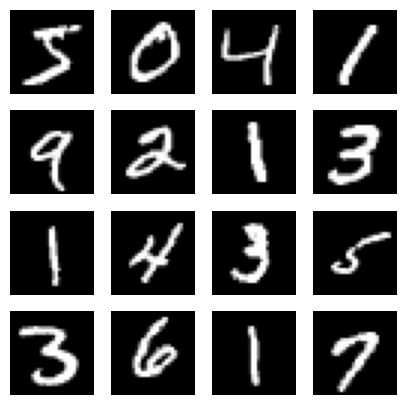

In [2]:
from matplotlib import pyplot as plt

def plot_images(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(5, 5))
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            if index < len(images):
                axes[i, j].imshow(images[index], cmap=plt.cm.gray)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
    plt.show()
    
plot_images(train_images, 4, 4)

In [3]:
from tensorflow import keras 
from keras import layers

def build_model():
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    flattened = layers.Flatten()(x)
    outputs = layers.Dense(10, activation="softmax")(flattened)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = build_model()

In [4]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10


844/844 [==============================] - 14s 15ms/step - loss: 0.2702 - accuracy: 0.9158 - val_loss: 0.1108 - val_accuracy: 0.9673
Epoch 2/10
844/844 [==============================] - 12s 14ms/step - loss: 0.0809 - accuracy: 0.9750 - val_loss: 0.0739 - val_accuracy: 0.9762
Epoch 3/10
844/844 [==============================] - 12s 14ms/step - loss: 0.0538 - accuracy: 0.9838 - val_loss: 0.0527 - val_accuracy: 0.9843
Epoch 4/10
844/844 [==============================] - 12s 15ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 5/10
844/844 [==============================] - 12s 14ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0391 - val_accuracy: 0.9900
Epoch 6/10
844/844 [==============================] - 12s 14ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0454 - val_accuracy: 0.9880
Epoch 7/10
844/844 [==============================] - 13s 15ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0629 - val_accura

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

  1/313 [..............................] - ETA: 13s - loss: 6.8587e-05 - accuracy: 1.0000

313/313 [==============================] - 1s 5ms/step - loss: 0.0483 - accuracy: 0.9897


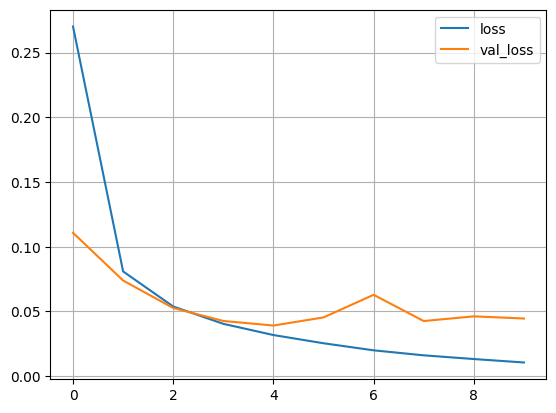

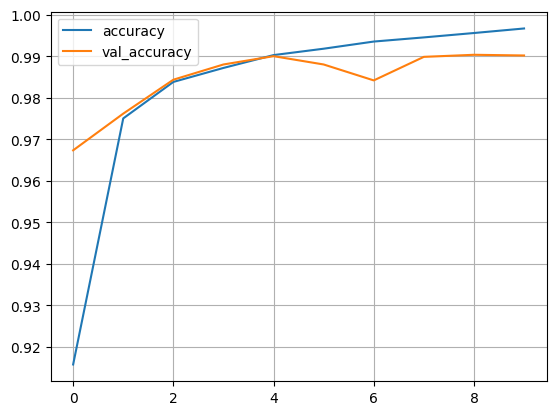

In [6]:
from matplotlib import pyplot as plt

def plot(history, what):
  plt.plot(history.history[what], label=what)
  plt.plot(history.history[f'val_{what}'], label=f'val_{what}')
  plt.legend()
  plt.grid(True)
  plt.show()
  
plot(history, 'loss')
plot(history, 'accuracy')

1/1 [==============================] - 0s 35ms/step
The model predicted the digit '2' with probability 0.731331467628479


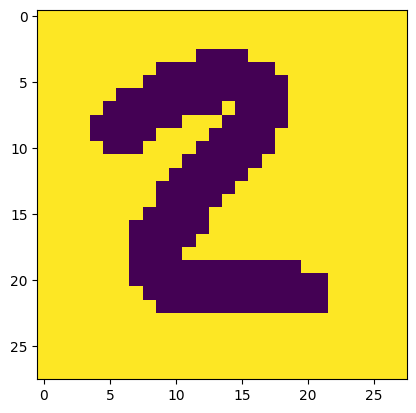

In [14]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

def inference(path : str) -> int:
    img = load_img(path, color_mode="grayscale", target_size=(28,28))
    arr = img_to_array(img).reshape((1, 28, 28, 1))
    arr = arr.astype("float32") / 255 
    prediction = model.predict(arr)
    max_index = np.argmax(prediction)
    probability = np.max(prediction)
    return (img, max_index, probability)


img, pred, prob = inference("2.png")
plt.imshow(img)
print(f"The model predicted the digit '{pred}' with probability {prob}")